In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchvision.datasets import MNIST
import torchvision.transforms as tfs


device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')

data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5), (0.5))
])
root = './'
train = MNIST(root, train=True,  transform=data_tfs, download=True)
test  = MNIST(root, train=False, transform=data_tfs, download=True)
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [2]:
"""
STRUCTURE:
- model
- loss
- optimizer
"""

model = nn.Sequential(
  nn.Linear(28*28, 64),
  nn.ReLU(),
  nn.Linear(64, 10)
  #softmax is not required
)
summary(model, (28*28,), batch_size=228)


criterion = nn.CrossEntropyLoss()      # logsoftmax + negative likelihood


optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [228, 64]          50,240
              ReLU-2                  [228, 64]               0
            Linear-3                  [228, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.68
Forward/backward pass size (MB): 0.24
Params size (MB): 0.19
Estimated Total Size (MB): 1.12
----------------------------------------------------------------


In [4]:
epochs = 3
losses = []

for i in range(epochs):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.view(x_batch.shape[0], -1)#.to(device)
    y_batch = y_batch#.to(device)
    
    logits = model(x_batch)
    loss = criterion(logits, y_batch)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'{i+1},\t loss: {losses[-1]}')

3,	 loss: 0.042146842926740646


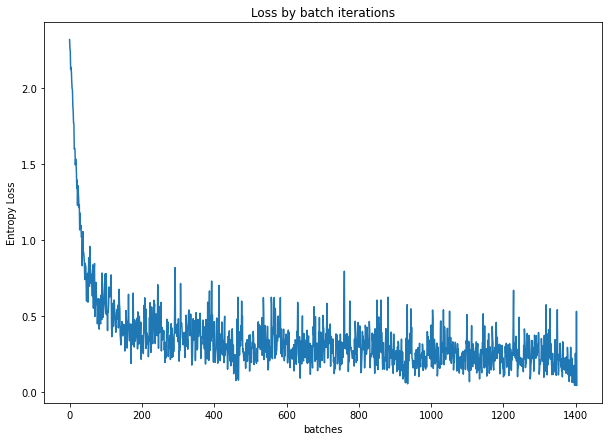

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(losses)
plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

batches = 0
trues = 0

for x_batch, y_batch in test_loader:
  x_batch = x_batch.view(x_batch.shape[0], -1)
  batches += 1
  predictions = torch.argmax(model(x_batch), dim = 1)
  trues += (predictions == y_batch).numpy().mean()

print("accuracy:", trues / batches)

accuracy: 0.9316907051282052
